# Image Segmentation 

### Sources: 

* [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/)

## Contents <a class="anchor" id="contents"></a>

* [Types of Image Segmentation](#types)
* [Region-based Segmentation](#region)
    * [Thereshold Segmentation](#threshold)
* [Edge Detection Segmentation](#edge)
    * [Sobel Operator](#sobel)
    * [Laplace Operator](#laplace)
* [Image Segmentation based on Clustering](#cluster)
* [Mask R-CNN](#rcnn)
* [Summary of Image Segmentation Techniques](#sum)

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/03/instance_segmentation_example.jpg" width=500/></center>

#### Object Detection
* Bounding Box for each class in the image
* No info about the shape of the object

#### Image Segmentation
* Group together the pixels that have similar attributes
* Create a pixel-wise mask for each object in the image

## Types of Image Segmentation <a class="anchor" id="types"></a>

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/03/Screenshot-from-2019-03-28-12-08-09.png" width=700/></center>

#### Semantic Segmentation
* every pixel belongs to a particular class (background or person)
* all the pixels belonging to a particular class are the same colour 

#### Instance Segmentation
* different objects of the same class have different colours  

[Contents](#contents)

## Region-based Segmentation <a class="anchor" id="region"></a>

### Thereshold Segmentation <a class="anchor" id="threshold"></a>

One simple way to segment different objects could be to use their pixel values. 

> An important point to note – the pixel values will be different for the objects and the image’s background if there’s a sharp contrast between them.



In this case, we can set a threshold value.

The pixel values falling below or above that threshold can be classified accordingly (as an object or the background). 
This technique is known as **Threshold Segmentation**.

If we want to divide the image into two regions (object and background), we define a single threshold value. This is known as the **global threshold**.

If we have multiple objects along with the background, we must define multiple thresholds. These thresholds are collectively known as the local threshold.

In [1]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

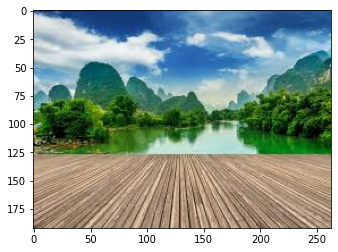

In [3]:
image = plt.imread('figures/1.jpeg')
image.shape
plt.imshow(image)

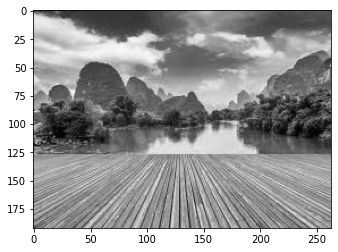

In [4]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [5]:
gray.shape

(192, 263)

* use the mean of the pixel values and use that as a threshold

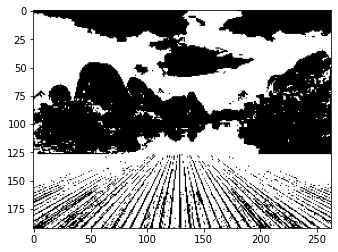

In [6]:
# Single threshold
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])

for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

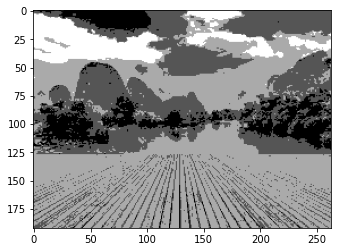

In [7]:
# Multiple thresholds
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

There are four different segments in the above image. You can set different threshold values and check how the segments are made. 

Some of the advantages of this method are:

* Calculations are simpler
* Fast operation speed
* When the object and background have high contrast, this method performs really well

But there are some limitations to this approach. 

When we don’t have significant grayscale difference, or there is an overlap of the grayscale pixel values, it becomes very difficult to get accurate segments.

[Contents](#contents)

## Edge Detection Segmentation <a class="anchor" id="edge"></a>

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/03/stride1.gif" /></center>

* Take the weight matrix
* Put it on top of the image
* Perform element-wise multiplication and get the output
* Move the weight matrix as per the stride chosen
* Convolve until all the pixels of the input are used

The values of the weight matrix define the output of the convolution. 

Researchers have found that choosing some specific values for these weight matrices helps us to detect horizontal or vertical edges (or even the combination of horizontal and vertical edges).



[Contents](#contents)

### Sobel Operator <a class="anchor" id="sobel"></a>

One such weight matrix is the **sobel operator**.

It is typically used to detect edges. 

The sobel operator has two weight matrices:
* one for detecting horizontal edges
* the other for detecting vertical edges

Sobel Filter (horizontal)

$$\begin{bmatrix} 1 & 2 & 1\\0 & 0 & 0\\-1 & -2 & -1 \end{bmatrix} $$

Sobel Filter (vertical)

$$\begin{bmatrix} -1 & 0 & 1\\-2 & 0 & 2\\-1 & 0 & 1 \end{bmatrix} $$

Edge detection works by convolving these filters over the given image.

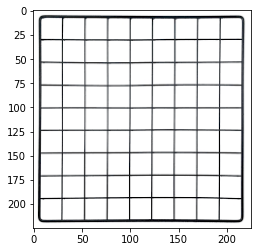

In [9]:
image = plt.imread('figures/index.png')
plt.imshow(image)

In [11]:
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
print()
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [12]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')

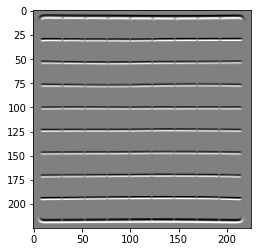

In [13]:
plt.imshow(out_h, cmap='gray')

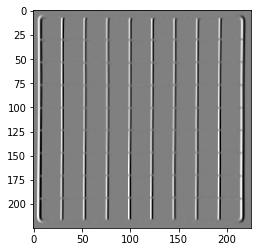

In [14]:
plt.imshow(out_v, cmap='gray')

[Contents](#contents)

### Laplace Operator <a class="anchor" id="laplace"></a>

* can detect both horizontal and vertical edges at the same time 

$$\begin{bmatrix} 1 & 1 & 1\\1 & 8 & 1\\1 & 1 & 1 \end{bmatrix} $$

In [15]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


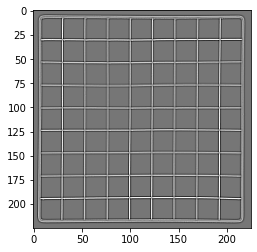

In [16]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')

[Contents](#contents)

## Image Segmentation based on Clustering <a class="anchor" id="cluster"></a>

Clustering is the task of dividing the population (data points) into a number of groups, such that data points in the same groups are more similar to other data points in that same group than those in other groups. These groups are known as clusters.

One of the most commonly used clustering algorithms is **k-means**. Here, the k represents the number of clusters (not to be confused with k-nearest neighbor).


**How k-means works:**

* First, randomly select k initial clusters
* Randomly assign each data point to any one of the k clusters
* Calculate the centers of these clusters
* Calculate the distance of all the points from the center of each cluster
* Depending on this distance, the points are reassigned to the nearest cluster
* Calculate the center of the newly formed clusters
* Finally, repeat steps (4), (5) and (6) until either the center of the clusters does not change or we reach the set number of iterations

The key advantage of using k-means algorithm is that it is simple and easy to understand. We are assigning the points to the clusters which are closest to them.

(192, 263, 3)


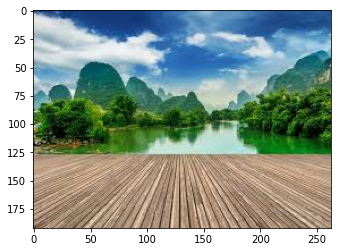

In [18]:
pic = plt.imread('figures/1.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

In [19]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(50496, 3)

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

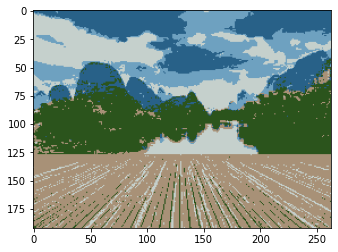

In [21]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

[Contents](#contents)

## Mask R-CNN <a class="anchor" id="rcnn"></a>

* Facebook AI Research (FAIR) - Mask R-CNN
* can create a pixel-wise mask for each object in an image

* Mask R-CNN is an extension of the popular Faster R-CNN object detection architecture. 
* Mask R-CNN adds a branch to the already existing Faster R-CNN outputs. 

The Faster R-CNN method generates two things for each object in the image:
* Its class
* The bounding box coordinates

Mask R-CNN adds a third branch to this which outputs the object mask as well.

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/03/Mask-R-CNN.png" width=700/></center>

* We take an image as input and pass it to the ConvNet, which returns the feature map for that image
* Region proposal network (RPN) is applied on these feature maps. This returns the object proposals along with their objectness score
* A RoI pooling layer is applied on these proposals to bring down all the proposals to the same size
* Finally, the proposals are passed to a fully connected layer to classify and output the bounding boxes for objects. It also returns the mask for each proposal

> Mask R-CNN is the current state-of-the-art for image segmentation and runs at 5 fps.

[Contents](#contents)

## Summary of Image Segmentation Techniques <a class="anchor" id="sum"></a>

<center><img src="figures/sum1.png" width=700/></center>
<center><img src="figures/sum2.png" width=700/></center>

[Contents](#contents)